# MalagaHouse

*Trabajo Fin de Máster FP en IA y Big Data realizado por Miguel Gámez Ruiz y Sergio Toscano Díaz*

<img width="650" src="https://drive.google.com/uc?id=1bKCPieOVMbV5VJoofNT9oPxnWGLWNN-U">

## 1. Justificación y descripción del proyecto



### Justificación:
Hemos decidido hacer un proyecto en el que se pueda obtener el precio de las viviendas en Málaga de una forma rápida. Pensamos que puede ser útil para quiénes buscan un lugar para vivir aquí en Málaga. De esta manera, el cliente podrá ver qué presupuesto necesitará para comprar o vender según el tipo de vivienda que esté buscando o vendiendo. Usamos datos reales para que el cliente tenga una estimación más acertada del precio.

### Descripción:
El proyecto de Machine Learning constará de lo siguiente:

- Un modelo entrenado que haga la predicción de las viviendas en Málaga.
- Una aplicación web en la que, en base a los parámetros que se pidan, se obtendrá el precio estimado de las viviendas.
- Enlaces a los recursos utilizados.
- Una presentación PDF y un vídeo explicativo del proyecto.

Tuvimos más propuestas para el proyecto como algo relacionado con series, películas o videojuegos, entre otros. Sin embargo nos decantamos por este finalmente, ya que pensamos que puede resultar más provechoso que los anteriores.

## 2. Obtención de datos

In [574]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [575]:
file_path = '/content/drive/MyDrive/datasets/MalagaHouse/housingmlg.csv'
houses = pd.read_csv(file_path)

In [576]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Descripción de los datos

En el dataset que hemos generado tenemos los siguientes campos:

- Ciudad: Nombre de la ciudad en la que se encuentra la vivienda.
- Precio: Precio de la vivienda.
- Superficie: Los metros cuadrados que ocupa la superficie de la vivienda.
- Habitaciones: Número de habitaciones que tiene la vivienda.
- Baños: Número de baños que tiene la vivienda.
- Garaje: Si tiene garaje o no. 1 si tiene y 0 si no tiene.
- Trastero: Si tiene garaje o no.  1 si tiene y 0 si no tiene.
- Ascensor: Si tiene ascensor o no. 1 si tiene y 0 si no tiene.
- Terraza: Si tiene terraza o no. 1 si tiene y 0 si no tiene.
- Amueblado: Si tiene amueblado o no. 1 si tiene y 0 si no tiene.
- Chimenea: Si tiene chimenea o no. 1 si tiene y 0 si no tiene.
- Piscina: Si tiene piscina o no. 1 si tiene y 0 si no tiene.
- Jardín: Si tiene jardín o no. 1 si tiene y 0 si no tiene.
- Descripción: Descripción de la vivienda según el vendedor.

## 4. Exploración y visualización de los datos

In [577]:
houses

,Ciudad,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,Este,775000,490,4,4,1,0,0,0,0,0,1,1,Se venda una impresionante vivienda a un preci...
1,Cruz de Humilladero,525000,185,5,2,1,1,1,1,0,0,0,0,"Amplio, cómodo, luminoso piso, situado en un e..."
2,Cruz de Humilladero,299000,140,3,2,0,1,1,1,0,0,0,0,"¿Buscas una vivienda amplia, luminosa, exterio..."
3,Centro,245000,100,3,2,1,0,1,0,0,0,0,0,La Finca Grupo Inmobiliario vende este maravil...
4,Bailén-Miraflores,270300,186,4,2,0,0,1,1,0,0,0,0,Vivienda localizada en barrio consolidado del ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Bailén-Miraflores,66000,66,4,2,0,0,0,0,1,0,0,0,"Piso en málaga capital, en la calle san albert..."
2186,Puerto de la Torre,499200,340,4,4,1,1,0,0,1,1,1,0,Puerto de la torre - los morales. Ideal para f...
2187,Este,980000,292,6,5,1,0,0,1,0,1,1,1,Nos complace presentar esta encantadora casa p...
2188,Bailén-Miraflores,330000,153,4,2,1,0,1,1,1,0,0,0,Qube Inmobiliaria vende amplia y luminosa vivi...


In [578]:
houses.head()

,Ciudad,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,Este,775000,490,4,4,1,0,0,0,0,0,1,1,Se venda una impresionante vivienda a un preci...
1,Cruz de Humilladero,525000,185,5,2,1,1,1,1,0,0,0,0,"Amplio, cómodo, luminoso piso, situado en un e..."
2,Cruz de Humilladero,299000,140,3,2,0,1,1,1,0,0,0,0,"¿Buscas una vivienda amplia, luminosa, exterio..."
3,Centro,245000,100,3,2,1,0,1,0,0,0,0,0,La Finca Grupo Inmobiliario vende este maravil...
4,Bailén-Miraflores,270300,186,4,2,0,0,1,1,0,0,0,0,Vivienda localizada en barrio consolidado del ...


In [579]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ciudad        2190 non-null   object
 1   Precio        2190 non-null   object
 2   Superficie    2190 non-null   int64 
 3   Habitaciones  2190 non-null   int64 
 4   Baños         2190 non-null   int64 
 5   Garaje        2190 non-null   int64 
 6   Trastero      2190 non-null   int64 
 7   Ascensor      2190 non-null   int64 
 8   Terraza       2190 non-null   int64 
 9   Amueblado     2190 non-null   int64 
 10  Chimenea      2190 non-null   int64 
 11  Piscina       2190 non-null   int64 
 12  Jardín        2190 non-null   int64 
 13  Descripción   2190 non-null   object
dtypes: int64(11), object(3)
memory usage: 239.7+ KB


¿Cuáles son los valores que contiene `Ciudad`?

In [580]:
houses['Ciudad'].unique()

array(['Este', 'Cruz de Humilladero', 'Centro', 'Bailén-Miraflores',
       'La Rosaleda-La Roca', 'Teatinos-Universidad',
       'Puerto de la Torre', 'Carretera de Cádiz', 'Churriana',
       'Campanillas', 'Ciudad Jardín'], dtype=object)

¿Cuántas casas hay en cada ciudad en este dataset?

In [581]:
houses['Ciudad'].value_counts()

Centro                  512
Este                    326
Carretera de Cádiz      287
Bailén-Miraflores       229
Cruz de Humilladero     198
Puerto de la Torre      147
Ciudad Jardín           120
Churriana               111
Teatinos-Universidad    102
La Rosaleda-La Roca      92
Campanillas              66
Name: Ciudad, dtype: int64

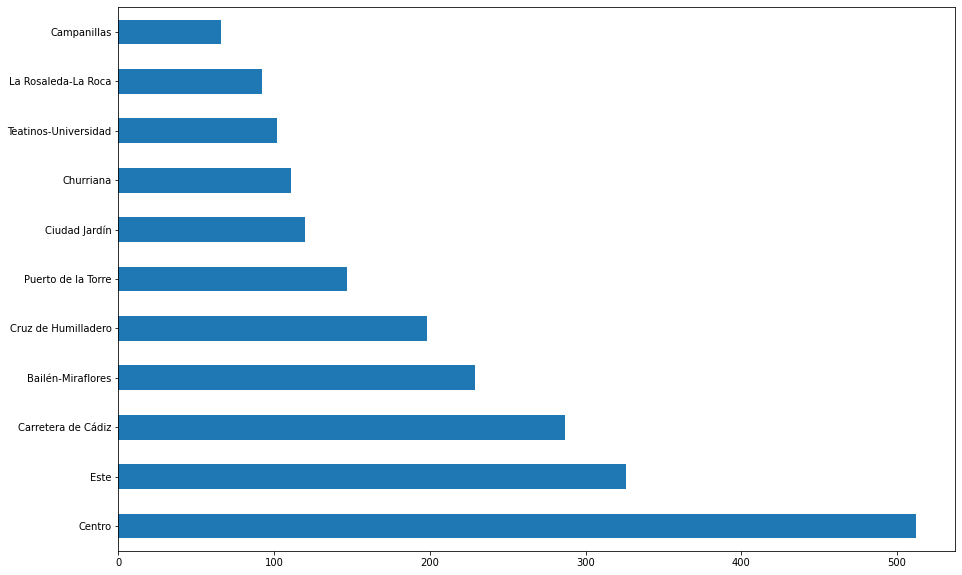

In [582]:
houses['Ciudad'].value_counts().plot(kind="barh", figsize = (15, 10))
plt.show()

In [583]:
centro = houses.loc[houses.Ciudad=='Centro Histórico-La Merced']

In [584]:
centro

,Ciudad,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción


In [585]:
#houses[['Ciudad','Precio']].sort_values(by="Ciudad",ascending=False)[:10].plot(kind='bar',x='Ciudad',y='Precio',cmap='Set2')
#plt.show()

In [586]:
#sns.jointplot(x='Precio',y='Superficie',data=centro)
#plt.show()

In [587]:
#centro[['Precio','Superficie']].sort_values(by='Precio',ascending=False)[:5].plot(kind='bar',x='Precio',y="Superficie",cmap='plasma')
#plt.title("",fontsize=15)
#plt.show()

¿Se repiten algunos precios?

In [588]:
houses['Precio'].value_counts()

350000    30
295000    21
240000    21
450000    20
175000    20
          ..
110200     1
114000     1
413500     1
153000     1
499200     1
Name: Precio, Length: 708, dtype: int64

Observamos que hay cuatro campos en los que el precio no es un dato numérico, por lo que decidimos eliminarlos.

In [589]:
houses[houses["Precio"] == "A consultar"]

,Ciudad,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
78,Puerto de la Torre,A consultar,90,2,2,1,0,0,1,0,0,1,0,"Edificio de 14 viviendas, 24 aparcamientos, tr..."
174,Cruz de Humilladero,A consultar,87,3,1,0,0,0,0,1,0,0,0,"Piso en málaga capital, en la calle malaga-rio..."
730,Puerto de la Torre,A consultar,103,3,2,1,1,1,1,0,0,0,0,Piso en un edificio de obra nueva de 103 m2 de...
1004,Carretera de Cádiz,A consultar,58,1,1,1,0,0,0,0,0,0,0,********promoción santa cristina ******** list...
1291,Puerto de la Torre,A consultar,71,1,1,1,1,1,1,0,0,0,0,Piso en un edificio de obra nueva de 71 m2 de ...
1317,La Rosaleda-La Roca,A consultar,84,2,2,0,0,0,0,1,0,0,0,"Piso en málaga capital, en la calle calle ebro..."
1780,Puerto de la Torre,A consultar,95,2,2,1,1,1,1,0,0,0,0,Piso en una finca de obra nueva de 95 m2 de su...
1953,Puerto de la Torre,A consultar,532,3,3,0,0,0,0,0,0,0,0,Próxima construcción de chalet independiente. ...


In [590]:
houses.drop(houses[(houses['Precio'] == 'A consultar')].index, inplace=True)

In [591]:
houses['Precio'] = houses['Precio'].astype('int')

In [592]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2182 entries, 0 to 2189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ciudad        2182 non-null   object
 1   Precio        2182 non-null   int64 
 2   Superficie    2182 non-null   int64 
 3   Habitaciones  2182 non-null   int64 
 4   Baños         2182 non-null   int64 
 5   Garaje        2182 non-null   int64 
 6   Trastero      2182 non-null   int64 
 7   Ascensor      2182 non-null   int64 
 8   Terraza       2182 non-null   int64 
 9   Amueblado     2182 non-null   int64 
 10  Chimenea      2182 non-null   int64 
 11  Piscina       2182 non-null   int64 
 12  Jardín        2182 non-null   int64 
 13  Descripción   2182 non-null   object
dtypes: int64(12), object(2)
memory usage: 255.7+ KB


Media, máximo, mínimo, percentiles, etc.

In [593]:
houses.describe()

,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
count,2.182000e+03,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000,2182.000000
mean,4.310261e+05,148.140697,3.286434,1.972961,0.417507,0.298808,0.533914,0.619615,0.231439,0.082951,0.213107,0.136572
std,4.691196e+05,113.055126,1.349169,1.101332,0.493261,0.457841,0.498963,0.485593,0.421849,0.275872,0.409597,0.343474
min,3.383000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.850000e+05,82.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.950000e+05,113.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.950000e+05,170.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.500000e+06,991.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [594]:
corr_matrix = houses.corr()
corr_matrix

,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
Precio,1.000000,0.499133,0.447996,0.701150,0.282673,0.153785,-0.124025,0.231298,-0.032775,0.260543,0.356930,0.286537
Superficie,0.499133,1.000000,0.606991,0.609187,0.248130,0.151130,-0.331575,0.262505,-0.036370,0.404064,0.354704,0.276015
Habitaciones,0.447996,0.606991,1.000000,0.630695,0.168838,0.075894,-0.225237,0.293056,-0.021469,0.315554,0.245432,0.192585
Baños,0.701150,0.609187,0.630695,1.000000,0.330543,0.206077,-0.233205,0.298833,-0.050672,0.349952,0.419344,0.320060
Garaje,0.282673,0.248130,0.168838,0.330543,1.000000,0.395467,0.025344,0.336007,-0.012871,0.203621,0.383209,0.358808
Trastero,0.153785,0.151130,0.075894,0.206077,0.395467,1.000000,0.047945,0.272250,-0.092343,0.119488,0.293529,0.142736
Ascensor,-0.124025,-0.331575,-0.225237,-0.233205,0.025344,0.047945,1.000000,0.030559,0.011705,-0.268603,-0.027527,-0.075195
Terraza,0.231298,0.262505,0.293056,0.298833,0.336007,0.272250,0.030559,1.000000,-0.064699,0.191155,0.248687,0.229144
Amueblado,-0.032775,-0.036370,-0.021469,-0.050672,-0.012871,-0.092343,0.011705,-0.064699,1.000000,0.004371,-0.014911,-0.110656
Chimenea,0.260543,0.404064,0.315554,0.349952,0.203621,0.119488,-0.268603,0.191155,0.004371,1.000000,0.289832,0.223945


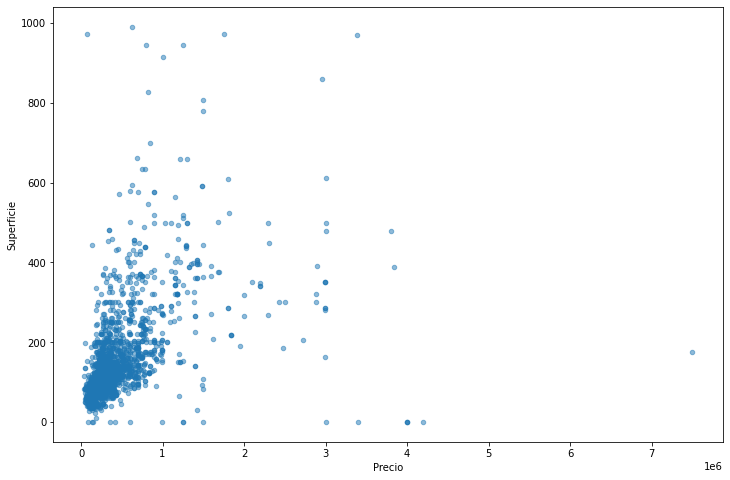

In [595]:
houses.plot(kind="scatter", x = "Precio", y = "Superficie", figsize = (12, 8), alpha = 0.5)
plt.show()

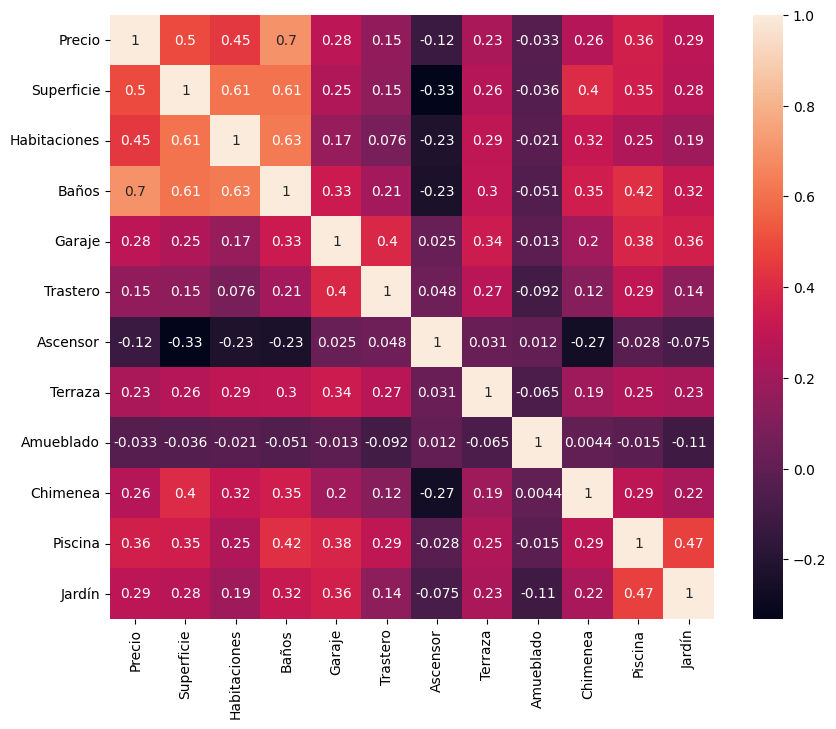

In [596]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
sns.heatmap(corr_matrix, annot=True, square=True, ax=ax)
plt.show()

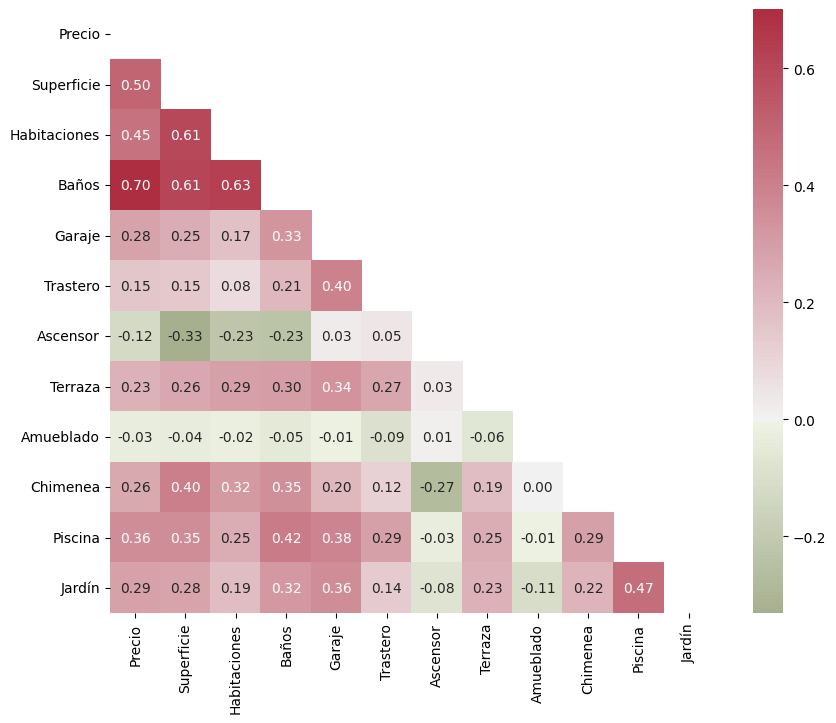

In [597]:
my_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
my_cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

sns.heatmap(corr_matrix, mask=my_mask, cmap=my_cmap, ax=ax, center=0, fmt='.2f', annot=True, square=True)
plt.show()

## 5. Limpieza de datos y Preparación de los datos para los algoritmos de Machine Learning

### Gestión de nulos

La mayoría de algoritmos de ML no trabajan bien cuando faltan datos. 

In [598]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2182 entries, 0 to 2189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ciudad        2182 non-null   object
 1   Precio        2182 non-null   int64 
 2   Superficie    2182 non-null   int64 
 3   Habitaciones  2182 non-null   int64 
 4   Baños         2182 non-null   int64 
 5   Garaje        2182 non-null   int64 
 6   Trastero      2182 non-null   int64 
 7   Ascensor      2182 non-null   int64 
 8   Terraza       2182 non-null   int64 
 9   Amueblado     2182 non-null   int64 
 10  Chimenea      2182 non-null   int64 
 11  Piscina       2182 non-null   int64 
 12  Jardín        2182 non-null   int64 
 13  Descripción   2182 non-null   object
dtypes: int64(12), object(2)
memory usage: 255.7+ KB


In [599]:
incomplete_rows = houses[houses.isnull().any(axis=1)]
incomplete_rows

,Ciudad,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción


Observamos que no hay valores nulos.

### Conversión de categorías a números

La mayoría de algoritmos de ML trabajan mejor con números que con categorías.

In [600]:
houses['Ciudad'] 

0                      Este
1       Cruz de Humilladero
2       Cruz de Humilladero
3                    Centro
4         Bailén-Miraflores
               ...         
2185      Bailén-Miraflores
2186     Puerto de la Torre
2187                   Este
2188      Bailén-Miraflores
2189              Churriana
Name: Ciudad, Length: 2182, dtype: object

In [601]:
houses["Ciudad"].unique()

array(['Este', 'Cruz de Humilladero', 'Centro', 'Bailén-Miraflores',
       'La Rosaleda-La Roca', 'Teatinos-Universidad',
       'Puerto de la Torre', 'Carretera de Cádiz', 'Churriana',
       'Campanillas', 'Ciudad Jardín'], dtype=object)

In [602]:
houses_ciu = houses["Ciudad"].unique()

In [603]:
ciudad_num = np.arange(len(houses["Ciudad"].unique()))
ciudad_num

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [604]:
houses["Ciudad"].replace(houses_ciu, ciudad_num, inplace=True)
houses

,Ciudad,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín,Descripción
0,0,775000,490,4,4,1,0,0,0,0,0,1,1,Se venda una impresionante vivienda a un preci...
1,1,525000,185,5,2,1,1,1,1,0,0,0,0,"Amplio, cómodo, luminoso piso, situado en un e..."
2,1,299000,140,3,2,0,1,1,1,0,0,0,0,"¿Buscas una vivienda amplia, luminosa, exterio..."
3,2,245000,100,3,2,1,0,1,0,0,0,0,0,La Finca Grupo Inmobiliario vende este maravil...
4,3,270300,186,4,2,0,0,1,1,0,0,0,0,Vivienda localizada en barrio consolidado del ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,3,66000,66,4,2,0,0,0,0,1,0,0,0,"Piso en málaga capital, en la calle san albert..."
2186,6,499200,340,4,4,1,1,0,0,1,1,1,0,Puerto de la torre - los morales. Ideal para f...
2187,0,980000,292,6,5,1,0,0,1,0,1,1,1,Nos complace presentar esta encantadora casa p...
2188,3,330000,153,4,2,1,0,1,1,1,0,0,0,Qube Inmobiliaria vende amplia y luminosa vivi...


### Eliminación de columnas

In [605]:
houses.drop(columns='Descripción', inplace=True)
houses

,Ciudad,Precio,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
0,0,775000,490,4,4,1,0,0,0,0,0,1,1
1,1,525000,185,5,2,1,1,1,1,0,0,0,0
2,1,299000,140,3,2,0,1,1,1,0,0,0,0
3,2,245000,100,3,2,1,0,1,0,0,0,0,0
4,3,270300,186,4,2,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,3,66000,66,4,2,0,0,0,0,1,0,0,0
2186,6,499200,340,4,4,1,1,0,0,1,1,1,0
2187,0,980000,292,6,5,1,0,0,1,0,1,1,1
2188,3,330000,153,4,2,1,0,1,1,1,0,0,0


In [606]:
#houses_mlg = houses.loc[houses.Ciudad=='Centro Histórico-La Merced']
#houses_mlg

In [607]:
#houses_mlg.drop(columns='Ciudad', inplace=True)
#houses_mlg

In [608]:
#houses_mlg

In [609]:
#houses.drop(columns='Amueblado', inplace=True)
#houses.drop(columns='Ascensor', inplace=True)
#houses.drop(columns='Jardín', inplace=True)
#houses.drop(columns='Piscina', inplace=True)
#houses.drop(columns='Terraza', inplace=True)
#houses.drop(columns='Trastero', inplace=True)
#houses.drop(columns='Garaje', inplace=True)
#houses.drop(columns='Chimenea', inplace=True)
#houses

### Separación de la matriz de características $X$ de los datos de salida $y$ (el target)

In [610]:
y = houses['Precio']
y

0       775000
1       525000
2       299000
3       245000
4       270300
         ...  
2185     66000
2186    499200
2187    980000
2188    330000
2189    291800
Name: Precio, Length: 2182, dtype: int64

In [611]:
X = houses.drop('Precio', axis=1)
X

,Ciudad,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
0,0,490,4,4,1,0,0,0,0,0,1,1
1,1,185,5,2,1,1,1,1,0,0,0,0
2,1,140,3,2,0,1,1,1,0,0,0,0
3,2,100,3,2,1,0,1,0,0,0,0,0
4,3,186,4,2,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,3,66,4,2,0,0,0,0,1,0,0,0
2186,6,340,4,4,1,1,0,0,1,1,1,0
2187,0,292,6,5,1,0,0,1,0,1,1,1
2188,3,153,4,2,1,0,1,1,1,0,0,0


### Creación de los datos de prueba

Separamos el dataset en dos partes:

* Datos de entrenamiento (training set) - 80%
* Datos de prueba (testing set) - 20% (Si tenemos muchos datos el porcentaje es menor)

In [612]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [613]:
X_train

,Ciudad,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
2129,6,267,4,2,1,1,0,1,0,1,1,0
1909,4,163,2,2,0,1,0,1,1,1,0,0
422,2,69,1,1,0,0,0,0,1,0,0,0
1217,10,131,4,2,1,1,1,1,0,0,0,0
1499,8,146,4,3,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1352,0,220,3,3,0,1,0,1,0,1,1,1
1120,2,115,4,2,0,0,1,0,1,0,0,0
1488,0,233,4,3,1,0,0,1,0,1,0,1
1813,1,78,3,1,0,0,1,0,0,0,0,0


In [614]:
X_test

,Ciudad,Superficie,Habitaciones,Baños,Garaje,Trastero,Ascensor,Terraza,Amueblado,Chimenea,Piscina,Jardín
1285,3,52,2,1,0,0,0,0,0,0,0,0
1084,4,360,5,3,0,0,0,1,1,0,0,0
1336,2,265,5,4,0,1,0,1,1,1,0,0
344,8,944,5,5,1,1,0,1,1,0,1,0
390,2,108,2,2,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1,60,2,1,0,0,0,0,0,0,0,0
564,9,168,3,2,1,0,0,1,0,0,0,1
468,2,56,1,1,0,0,0,0,0,0,0,0
1886,3,110,3,1,0,0,1,1,0,0,0,0


In [615]:
y_train

2129    630000
1909    440000
422     190000
1217    245000
1499    395000
         ...  
1352    595000
1120    390000
1488    790000
1813    175000
523     230000
Name: Precio, Length: 1963, dtype: int64

In [616]:
y_test

1285      90000
1084     318000
1336    1995000
344      795000
390      308000
         ...   
1535     144000
564      259800
468      175000
1886     185000
1858     430000
Name: Precio, Length: 219, dtype: int64

## 6. Entrenamiento del modelo y comprobación del rendimiento

### LinearRegression

In [617]:
from sklearn.linear_model import LinearRegression

houses_model = LinearRegression()

In [618]:
# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

LinearRegression()

In [619]:
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

In [620]:
print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
90000.00    114611.16         24611.16
318000.00    773897.38        455897.38
1995000.00    909993.68       1085006.32
795000.00   1732264.23        937264.23
308000.00    560773.70        252773.70
340000.00    993474.01        653474.01
109000.00    148369.68         39369.68
148000.00    212835.34         64835.34
152000.00    186631.48         34631.48
395000.00    604100.98        209100.98
600210.00    773637.20        173427.20
520000.00    677320.47        157320.47
169000.00     39974.68        129025.32
314950.00    323444.96          8494.96
699000.00    461090.88        237909.12
594500.00    850862.03        256362.03
375000.00    439230.45         64230.45
360000.00    478645.87        118645.87
189900.00    302573.13        112673.13
348000.00    320791.77         27208.23


In [621]:
from sklearn.metrics import mean_squared_error, r2_score

# Coeficientes
print("Coeficientes: \n", houses_model.coef_)

# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Coeficientes: 
 [-21414.41357994    797.67259128 -21686.81955093 251290.31193134
  34484.37986399 -11353.55624146  41831.50818221   2429.59322435
  -4932.28439419 -70890.385585    52472.2632      13556.52911911]
Error cuadrático medio:  475067.69863035646
Coeficiente de determinación:  0.3418170475865808


### DecisionTreeRegressor

In [622]:
from sklearn.tree import DecisionTreeRegressor

houses_model = DecisionTreeRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
90000.00    119990.00         29990.00
318000.00    750000.00        432000.00
1995000.00   1395000.00        600000.00
795000.00   1300000.00        505000.00
308000.00    258000.00         50000.00
340000.00    340000.00             0.00
109000.00    109000.00             0.00
148000.00    143500.00          4500.00
152000.00    289000.00        137000.00
395000.00    770000.00        375000.00
600210.00    649900.00         49690.00
520000.00   1800000.00       1280000.00
169000.00    176000.00          7000.00
314950.00    314950.00             0.00
699000.00    275000.00        424000.00
594500.00    595000.00           500.00
375000.00    735000.00        360000.00
360000.00    280000.00         80000.00
189900.00    220000.00         30100.00
348000.00    196000.00        152000.00


In [623]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  504705.30153548805
Coeficiente de determinación:  0.25713250092490525


### RandomForestRegressor

In [624]:
from sklearn.ensemble import RandomForestRegressor

houses_model = RandomForestRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
90000.00    122571.40         32571.40
318000.00    801626.25        483626.25
1995000.00   1244975.25        750024.75
795000.00   1792680.00        997680.00
308000.00    352906.18         44906.18
340000.00    440289.00        100289.00
109000.00    112143.06          3143.06
148000.00    152616.58          4616.58
152000.00    177178.70         25178.70
395000.00    625830.00        230830.00
600210.00    726940.50        126730.50
520000.00    777866.49        257866.49
169000.00    158187.00         10813.00
314950.00    318778.33          3828.33
699000.00    309200.00        389800.00
594500.00    645059.00         50559.00
375000.00    384087.10          9087.10
360000.00    344239.50         15760.50
189900.00    209189.67         19289.67
348000.00    344797.86          3202.14


In [625]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  422916.036631801
Coeficiente de determinación:  0.4783923744698583


### GradientBoostingRegressor

In [626]:
from sklearn.ensemble import GradientBoostingRegressor

houses_model = GradientBoostingRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
90000.00    110545.75         20545.75
318000.00    552360.68        234360.68
1995000.00   1116688.17        878311.83
795000.00   1847511.46       1052511.46
308000.00    403469.51         95469.51
340000.00    591615.45        251615.45
109000.00    106644.20          2355.80
148000.00    119026.71         28973.29
152000.00    228305.91         76305.91
395000.00    502539.26        107539.26
600210.00    626318.89         26108.89
520000.00    766388.48        246388.48
169000.00    156951.07         12048.93
314950.00    292028.69         22921.31
699000.00    355817.74        343182.26
594500.00    732890.79        138390.79
375000.00    459881.87         84881.87
360000.00    425668.95         65668.95
189900.00    220872.40         30972.40
348000.00    312955.51         35044.49


In [627]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  394070.6770686778
Coeficiente de determinación:  0.5471192460556178


### ElasticNet

In [628]:
from sklearn.linear_model import ElasticNet

houses_model = ElasticNet()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
90000.00    161045.19         71045.19
318000.00    803228.90        485228.90
1995000.00    892594.47       1102405.53
795000.00   1711604.54        916604.54
308000.00    453598.46        145598.46
340000.00   1087656.37        747656.37
109000.00    239373.03        130373.03
148000.00    204083.14         56083.14
152000.00    208763.25         56763.25
395000.00    571600.13        176600.13
600210.00    766645.15        166435.15
520000.00    697093.22        177093.22
169000.00     86384.09         82615.91
314950.00    324943.29          9993.29
699000.00    390260.97        308739.03
594500.00    773484.31        178984.31
375000.00    360059.99         14940.01
360000.00    421858.91         61858.91
189900.00    235341.68         45441.68
348000.00    401997.75         53997.75


In [629]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  486820.1176840266
Coeficiente de determinación:  0.3088494487283183


### BayesianRidge

In [630]:
from sklearn.linear_model import BayesianRidge

houses_model = BayesianRidge()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
90000.00    115853.13         25853.13
318000.00    772819.54        454819.54
1995000.00    916334.65       1078665.35
795000.00   1725033.97        930033.97
308000.00    555755.94        247755.94
340000.00   1001497.87        661497.87
109000.00    151005.91         42005.91
148000.00    212448.88         64448.88
152000.00    187050.56         35050.56
395000.00    602251.60        207251.60
600210.00    771905.79        171695.79
520000.00    675000.89        155000.89
169000.00     41059.08        127940.92
314950.00    324494.52          9544.52
699000.00    458636.84        240363.16
594500.00    847930.84        253430.84
375000.00    435021.76         60021.76
360000.00    476092.38        116092.38
189900.00    300137.49        110237.49
348000.00    329055.71         18944.29


In [631]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  474607.262829442
Coeficiente de determinación:  0.3430922516770468


### CatBoostRegressor

In [632]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [633]:
from catboost import CatBoostRegressor

houses_model = CatBoostRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Learning rate set to 0.045547
0:	learn: 443136.9705802	total: 1.25ms	remaining: 1.25s
1:	learn: 433430.8896917	total: 2.52ms	remaining: 1.26s
2:	learn: 423933.4092911	total: 3.63ms	remaining: 1.21s
3:	learn: 414174.8614257	total: 4.72ms	remaining: 1.18s
4:	learn: 405674.4141912	total: 5.57ms	remaining: 1.11s
5:	learn: 396600.4500748	total: 6.47ms	remaining: 1.07s
6:	learn: 388186.5045680	total: 7.44ms	remaining: 1.06s
7:	learn: 380394.8833267	total: 8.56ms	remaining: 1.06s
8:	learn: 373554.3765856	total: 9.45ms	remaining: 1.04s
9:	learn: 366795.8158512	total: 10.4ms	remaining: 1.02s
10:	learn: 360184.3138106	total: 11.2ms	remaining: 1.01s
11:	learn: 354176.0774200	total: 12.1ms	remaining: 996ms
12:	learn: 348675.4991937	total: 13ms	remaining: 989ms
13:	learn: 342783.8224237	total: 13.9ms	remaining: 977ms
14:	learn: 337416.6901714	total: 15ms	remaining: 985ms
15:	learn: 332158.0360640	total: 16.1ms	remaining: 991ms
16:	learn: 327426.9747522	total: 17.4ms	remaining: 1.01s
17:	learn: 3227

In [634]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  439468.77186408744
Coeficiente de determinación:  0.43676236682452385


### XGBRegressor

In [635]:
from xgboost.sklearn import XGBRegressor

houses_model = XGBRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

[09:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Precios reales   Precios estimados   Error absoluto
90000.00    115039.85         25039.85
318000.00    549328.12        231328.12
1995000.00    993965.88       1001034.12
795000.00   1625660.12        830660.12
308000.00    392376.81         84376.81
340000.00    595369.75        255369.75
109000.00    102100.89          6899.11
148000.00    112500.86         35499.14
152000.00    228871.11         76871.11
395000.00    495261.91        100261.91
600210.00    678654.31         78444.31
520000.00    679208.12        159208.12
169000.00    161818.09          7181.91
314950.00    297991.91         16958.09
699000.00    359947.00        339053.00
594500.00    742792.12        148292.12
375000.00    464963.94         89963.94
360000.00    430778.47         70778.47
189900.00    219416.77         29516.77
348000.00    340294.09          7705.91


In [636]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  409826.09336581844
Coeficiente de determinación:  0.510181891217466


### LGBMRegressor

In [637]:
from lightgbm import LGBMRegressor

houses_model = LGBMRegressor()

# Entrenamiento del modelo
houses_model.fit(X_train, y_train)

# Predicción
y_pred = houses_model.predict(X_test)

y_test_list = y_test.tolist()

print("Precios reales   Precios estimados   Error absoluto")
for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r -e)
  print(f"{r:6.2f} {e:12.2f} {e_abs:16.2f}")

Precios reales   Precios estimados   Error absoluto
90000.00     92209.25          2209.25
318000.00    500605.50        182605.50
1995000.00    850043.93       1144956.07
795000.00   1801946.51       1006946.51
308000.00    357557.20         49557.20
340000.00    269450.46         70549.54
109000.00    130814.46         21814.46
148000.00    117090.42         30909.58
152000.00    212759.28         60759.28
395000.00    560786.67        165786.67
600210.00    687996.69         87786.69
520000.00    637616.15        117616.15
169000.00    146433.86         22566.14
314950.00    295288.00         19662.00
699000.00    441525.82        257474.18
594500.00    666964.20         72464.20
375000.00    400329.16         25329.16
360000.00    437170.57         77170.57
189900.00    193060.44          3160.44
348000.00    373244.16         25244.16


In [638]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  426044.69875181804
Coeficiente de determinación:  0.47064629598086316


## 7. Aplicación de Procesamiento de Lenguaje Natural

# 8. Enlace a la aplicación web 

# 9. Conclusiones